# Bot-vs-bot reverts
## Getting and processing data

In [ ]:
# bot-vs-bot revert table: https://quarry.wmflabs.org/query/17237

!wget https://quarry.wmflabs.org/run/161084/output/0/tsv?download=true -O botvbot.tsv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("botvbot.tsv", sep="\t")
len(df)

162688

In [3]:
print(df.columns)

Index(['rev_id', 'rev_timestamp', 'rev_user', 'rev_user_text', 'rev_page',
       'rev_sha1', 'rev_minor_edit', 'rev_deleted', 'rev_parent_id',
       'archived', 'reverting_id', 'reverting_timestamp', 'reverting_user',
       'reverting_user_text', 'reverting_page', 'reverting_sha1',
       'reverting_minor_edit', 'reverting_deleted', 'reverting_parent_id',
       'reverting_archived', 'rev_revert_offset', 'revisions_reverted',
       'reverted_to_rev_id', 'page_namespace'],
      dtype='object')


In [4]:
df[0:5]

,rev_id,rev_timestamp,rev_user,rev_user_text,rev_page,rev_sha1,rev_minor_edit,rev_deleted,rev_parent_id,archived,...,reverting_page,reverting_sha1,reverting_minor_edit,reverting_deleted,reverting_parent_id,reverting_archived,rev_revert_offset,revisions_reverted,reverted_to_rev_id,page_namespace
0,56161718,20060531172522,91310,CanisRufus,584516,1lyohbi8ymubjfzdb4w4ssfiflfpgat,1,0,54170358,0,...,584516,b3lf3olmh1hw99f68tjh187jl7dzi1j,1,0,56161718,0,1,1,54170358,0
1,56161633,20060531172452,91310,CanisRufus,793703,bxfv9z3d7uypsla28qfioc5qs4l963w,1,0,54169562,0,...,793703,1nlk1pfhntoa3m0inrdpotrqb5ajxif,1,0,56161633,0,1,1,54169562,0
2,103117636,20070125105128,234358,Mathbot,5202035,6ruzx0gegy5xy0mw5yxsdnh1fir7mwd,0,0,102641383,0,...,5202035,c6uu9wkg34ko0nidqakdktfkkvcds3k,0,0,104315087,0,1,3,102641383,4
3,105582355,20070204154028,234358,Mathbot,6744678,p14vq3lzxeu50upo1ax9h3ya2hrz1hv,0,0,104618440,0,...,6744678,qaiydx752b8av3qp2zbnfpqspttpw91,0,0,105582355,0,1,1,104618440,4
4,105627219,20070204194135,234358,Mathbot,8468041,rebsad1ch2hvs85nhf0nwm2r8ukboil,0,0,104982162,0,...,8468041,3lda2892o6z3p29r8xipbqh780h2rph,0,0,105627219,0,1,1,104982162,4


In [5]:
df['reverting_timestamp_dt'] = pd.to_datetime(df['reverting_timestamp'], format="%Y%m%d%H%M%S")

In [6]:
df = df.set_index('reverting_timestamp_dt')

### Total reverts by namespace

In [7]:
df.page_namespace.value_counts()

0      84804
4      31309
14     28753
1      10856
3       3372
2       1389
10      1326
5        355
6        218
11       215
109       37
100       27
7          9
118        5
15         4
108        4
101        3
12         2
Name: page_namespace, dtype: int64

## Group by reverter and namespace


In [8]:
df.reverting_user_text.value_counts()

Addbot                    47319
AvicBot                   19420
HBC AIV helperbot7        18692
Xqbot                     17958
EmausBot                  16507
HBC AIV helperbot5         5945
RussBot                    5161
KLBot2                     3882
タチコマ robot                 3807
ClueBot II                 3551
WildBot                    3261
DumbBOT                    3028
Cydebot                    2207
ClueBot III                2071
HBC AIV helperbot11        1239
Chobot                     1078
JL-Bot                      860
Amalthea (bot)              782
Lowercase sigmabot III      698
Yobot                       682
AnomieBOT                   607
Thehelpfulbot               585
HBC AIV helperbot3          532
Mathbot                     485
JAnDbot                     191
718 Bot                     188
HBC AIV helperbot           161
Citation bot                150
RjwilmsiBot                 140
DixonDBot                   125
                          ...  
CheMoBot

In [9]:
len(df.reverting_user_text.value_counts())

96

In [22]:
topbots = df.reverting_user_text.value_counts().index.tolist()[0:24]
topbots

['Addbot',
 'AvicBot',
 'HBC AIV helperbot7',
 'Xqbot',
 'EmausBot',
 'HBC AIV helperbot5',
 'RussBot',
 'KLBot2',
 'タチコマ robot',
 'ClueBot II',
 'WildBot',
 'DumbBOT',
 'Cydebot',
 'ClueBot III',
 'HBC AIV helperbot11',
 'Chobot',
 'JL-Bot',
 'Amalthea (bot)',
 'Lowercase sigmabot III',
 'Yobot',
 'AnomieBOT',
 'Thehelpfulbot',
 'HBC AIV helperbot3',
 'Mathbot']

In [30]:
gp3 = df.groupby([pd.TimeGrouper('1D', closed='left'), 'reverting_user_text'])

In [31]:
user_namespace_g = gp3.rev_id.count()
user_namespace_g.head()

reverting_timestamp_dt  reverting_user_text
2006-05-20              MessedRobot            1
2006-06-30              Cydebot                2
2006-07-21              RussBot                1
2006-07-24              RussBot                2
2007-02-05              WP 1.0 bot             2
Name: rev_id, dtype: int64

In [32]:
user_namespace_g.unstack().head()

reverting_user_text,718 Bot,Addbot,Amalthea (bot),AnomieBOT,ArmbrustBot,ArticlesForCreationBot,AvicBot,BG19bot,BOTarate,BOTijo,...,The Anomebot2,Thehelpfulbot,UcuchaBot,VeblenBot,VoxelBot,WP 1.0 bot,WildBot,Xqbot,Yobot,タチコマ robot
reverting_timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2006-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [33]:
user_namespace_unstack = user_namespace_g.unstack()[topbots]

## Botplots

### Daily reverts subplotted by reverting bot, linear y-axis, not shared y-axis

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


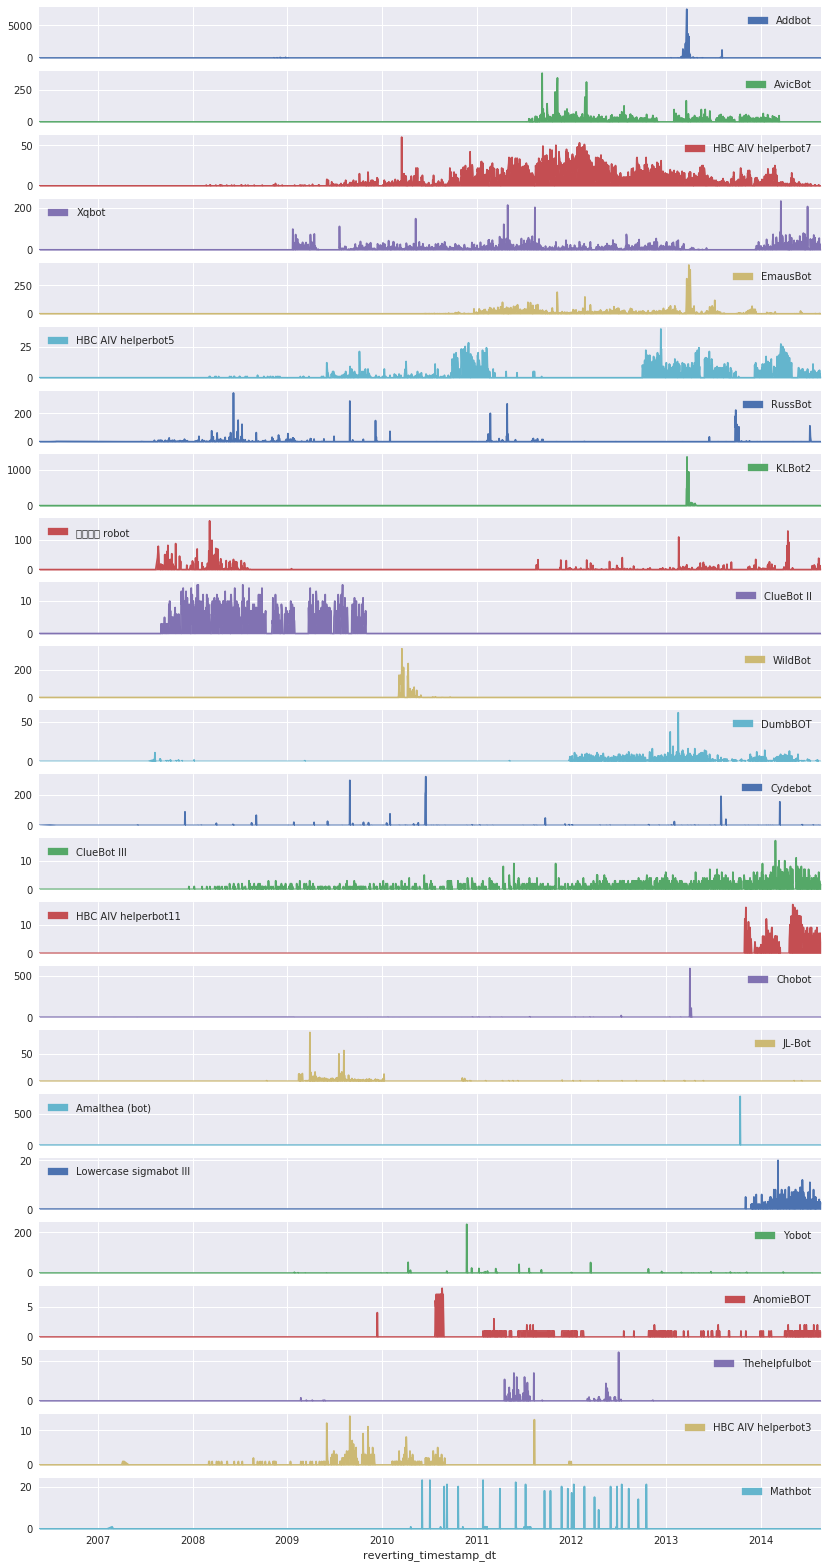

In [34]:
fig, axes = plt.subplots(ncols=1,nrows=len(topbots), figsize=[14,28], sharex=True)
user_namespace_unstack[topbots].plot(subplots=True, kind='area', ax=axes)
fig.subplots_adjust(hspace=.25)


### Daily reverts subplotted by reverting bot, linear y-axis, shared y-axis

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


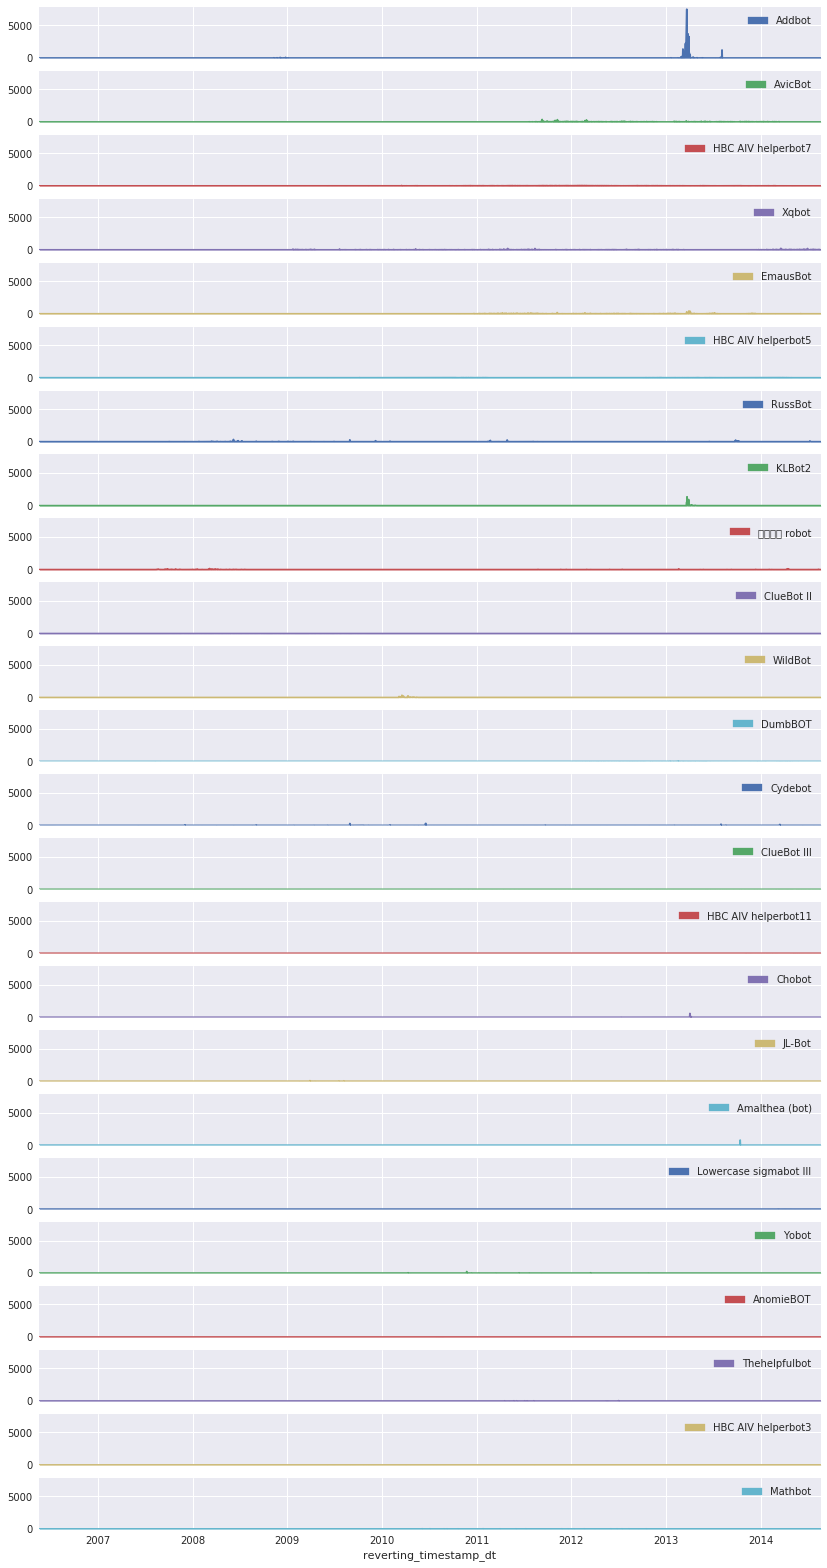

In [35]:
fig, axes = plt.subplots(ncols=1,nrows=len(topbots), figsize=[14,28], sharex=True, sharey=True)
user_namespace_unstack[topbots].plot(subplots=True, kind='area', ax=axes)
fig.subplots_adjust(hspace=.25)


/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


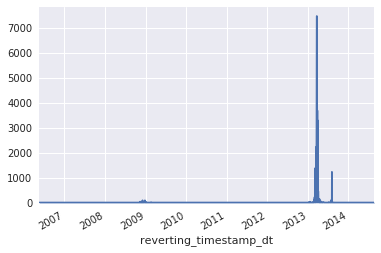

In [36]:
user_namespace_unstack['Addbot'].plot(kind='area')

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


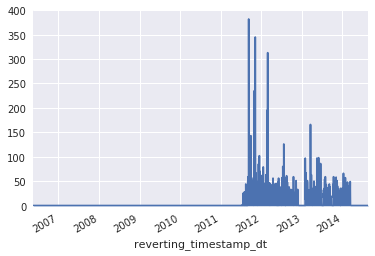

In [37]:
user_namespace_unstack['AvicBot'].plot(kind='area')

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


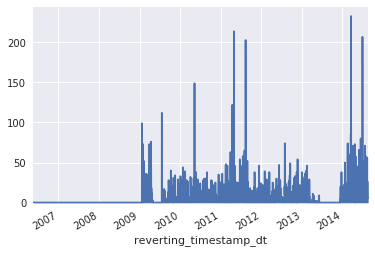

In [38]:
user_namespace_unstack['Xqbot'].plot(kind='area')

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


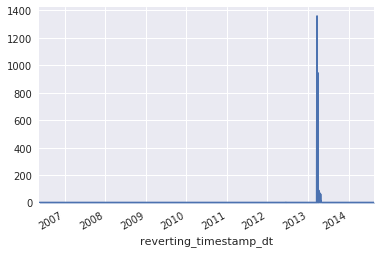

In [39]:
user_namespace_unstack['KLBot2'].plot(kind='area')


/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


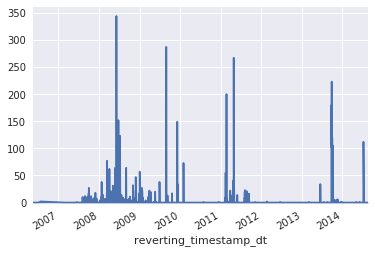

In [40]:
user_namespace_unstack['RussBot'].plot(kind='area')